In [1]:
"""
8/25/21

diego.aliaga at helsinki dot fi
"""

'\n8/25/21\n\ndiego.aliaga at helsinki dot fi\n'

In [81]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
# from useful_scit.imps2.defs import *
# from sklearn.linear_model import ElasticNet,ElasticNetCV
# import flexpart_management.modules.flx_array as fa
import warnings
warnings.filterwarnings('ignore',category=UserWarning)


import sys
sys.path.insert(0,'../..')
import wiebke_dms_lake.funss as fu

In [2]:

# def main():
#     pass

In [3]:
data_ptr = fu.open_ptr_data()
da_flx, das_flx, df_flx, dfs_flx  = fu.open_flx_data2()

In [4]:
com_ptr,com_flx = fu.combine_data(data_ptr, dfs_flx)

In [97]:
fa.LOLA_LAPAZ[2:]

[-18, -14]

/Users/aliaga/miniforge3/envs/q5/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aliaga/miniforge3/envs/q5/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aliaga/miniforge3/envs/q5/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/aliaga/miniforge3/envs/q5/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised i

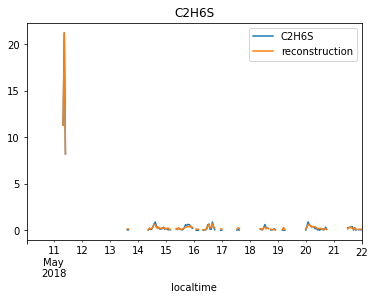

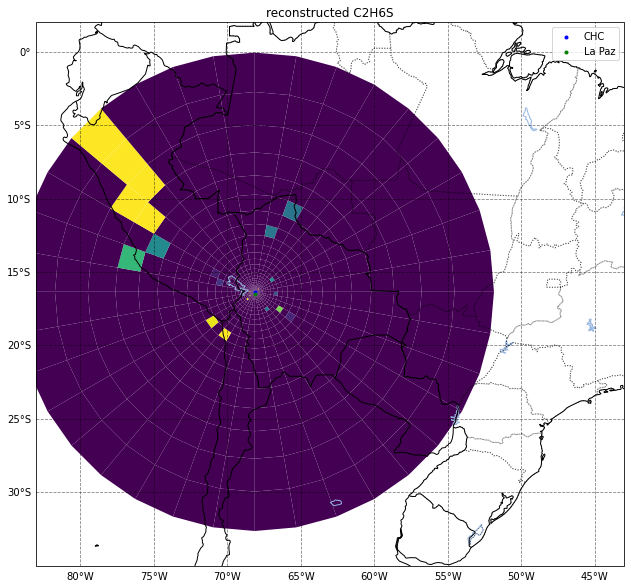

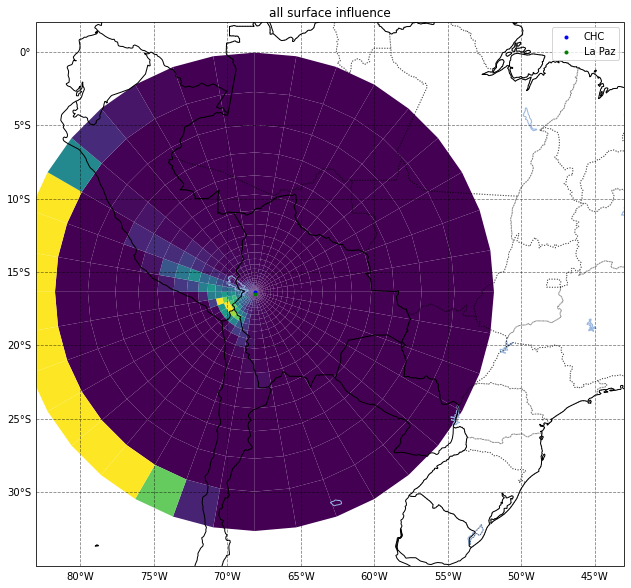

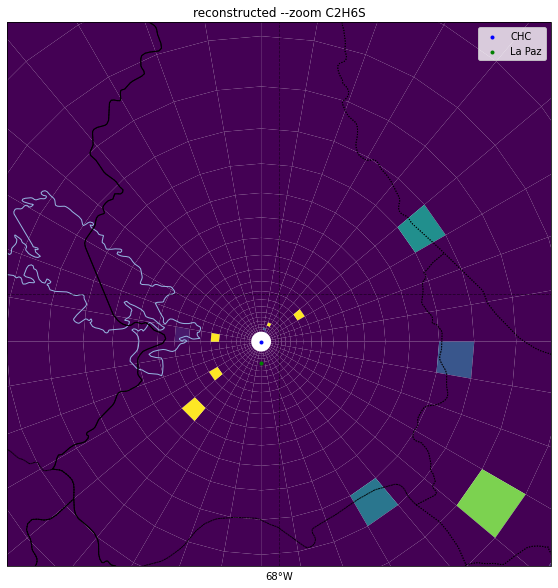

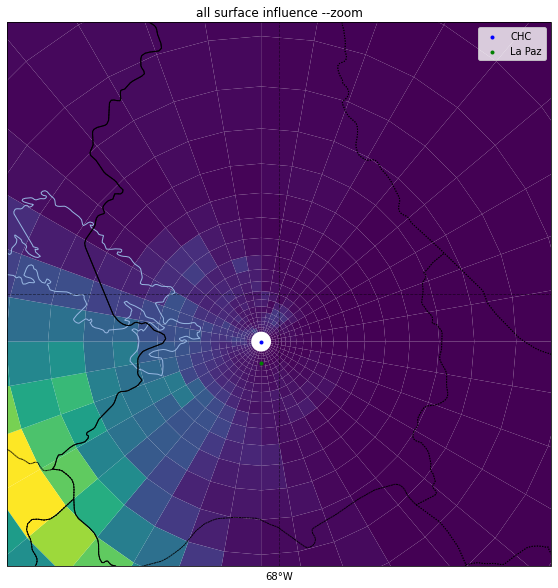

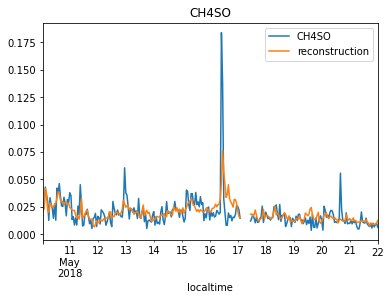

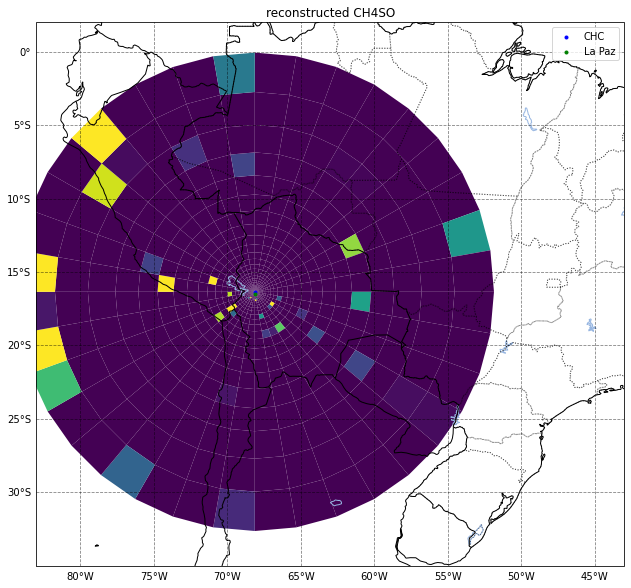

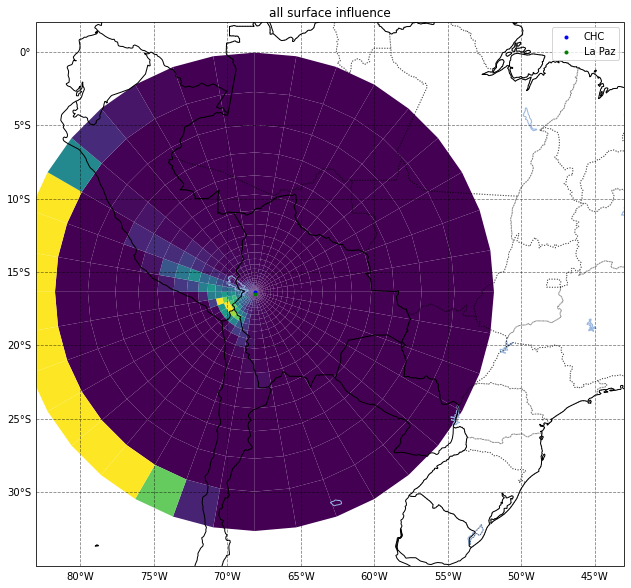

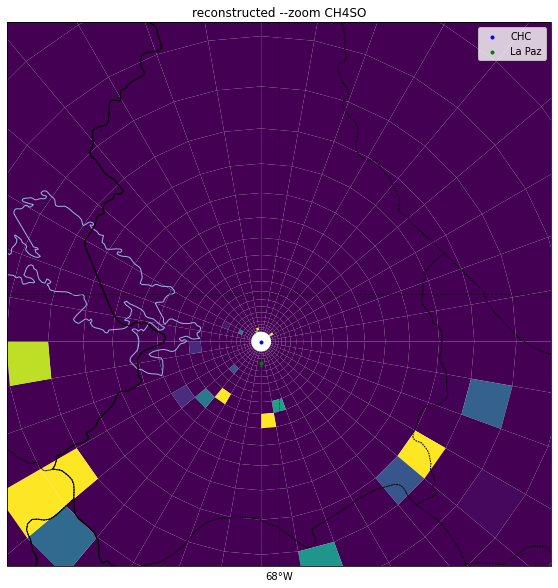

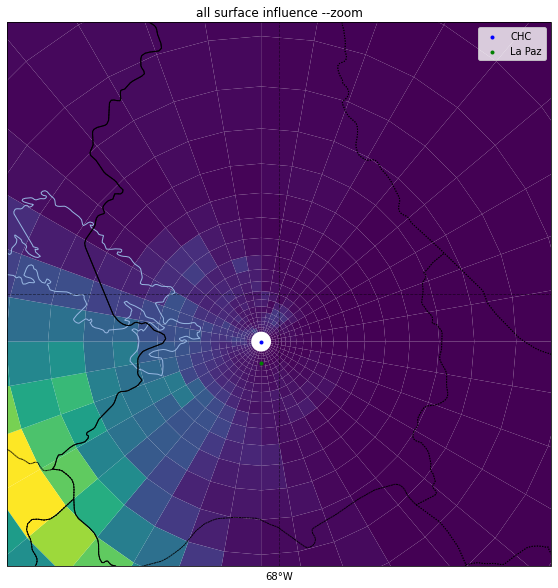

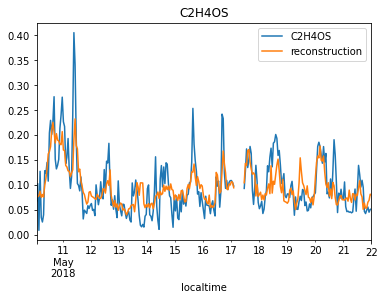

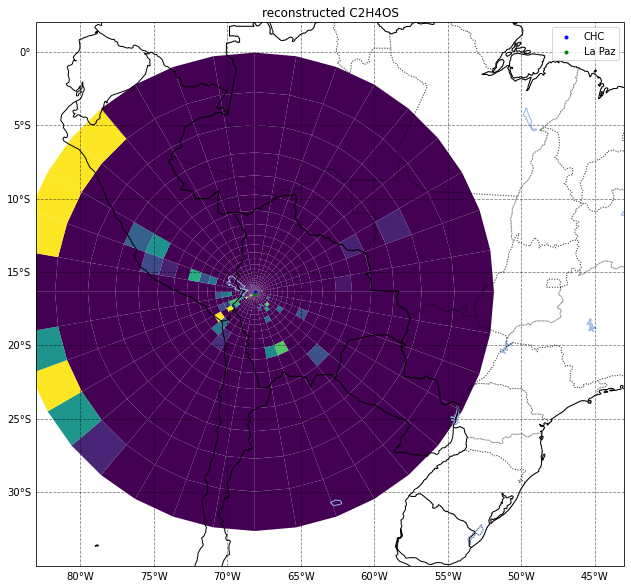

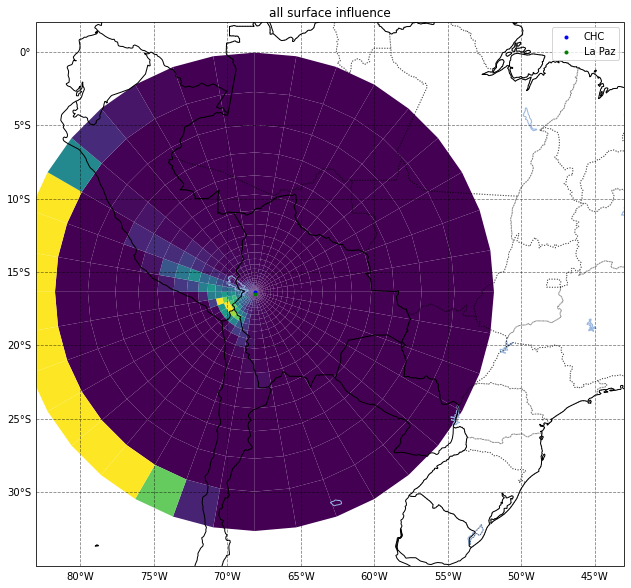

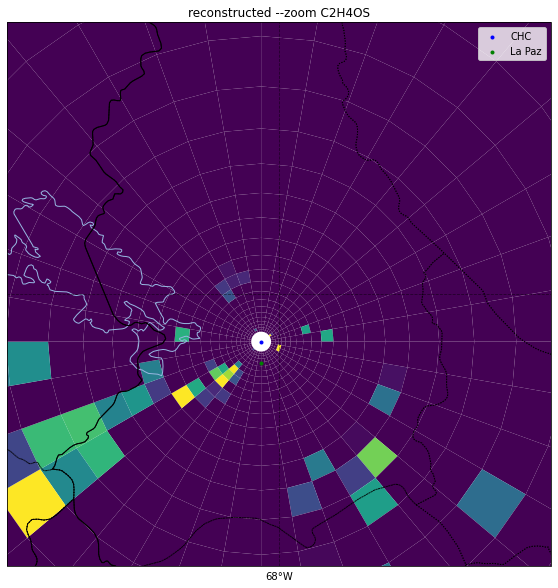

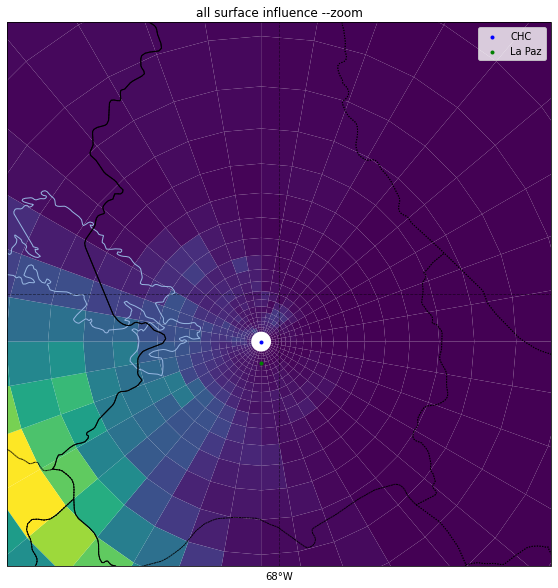

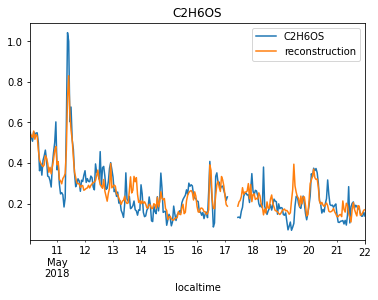

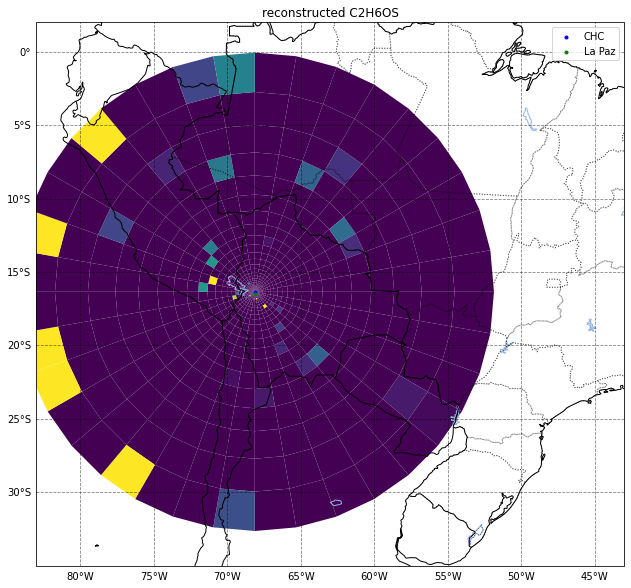

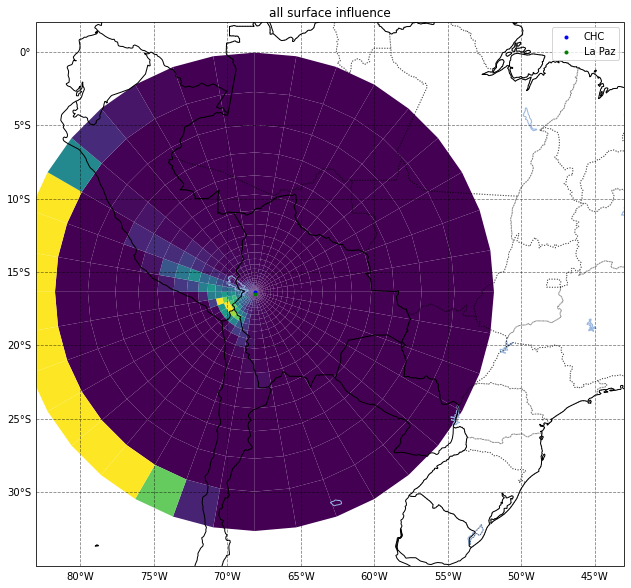

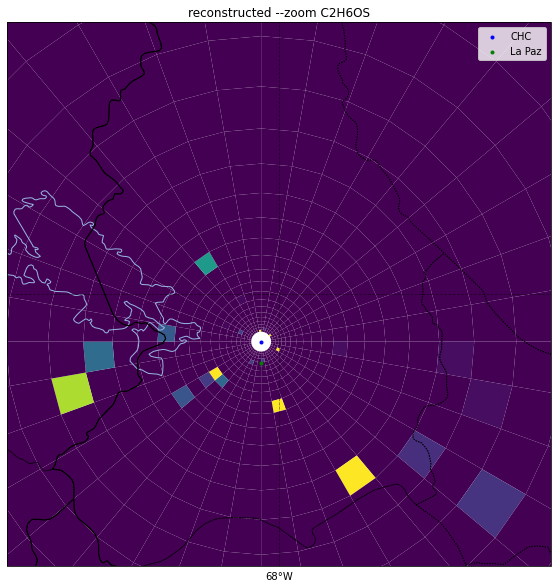

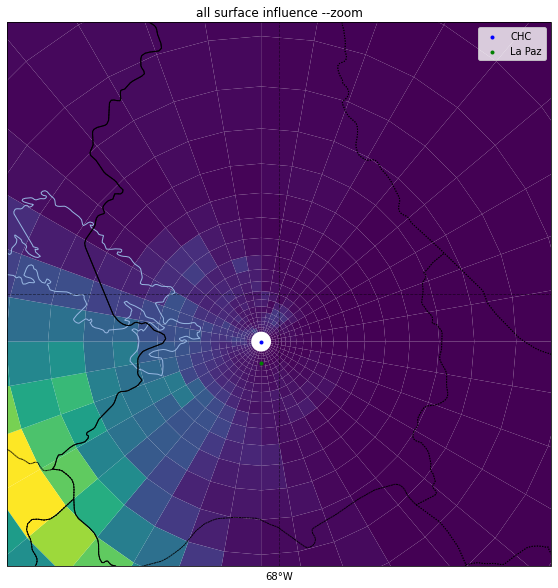

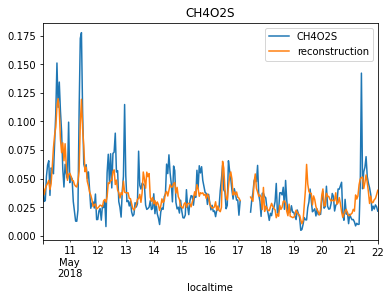

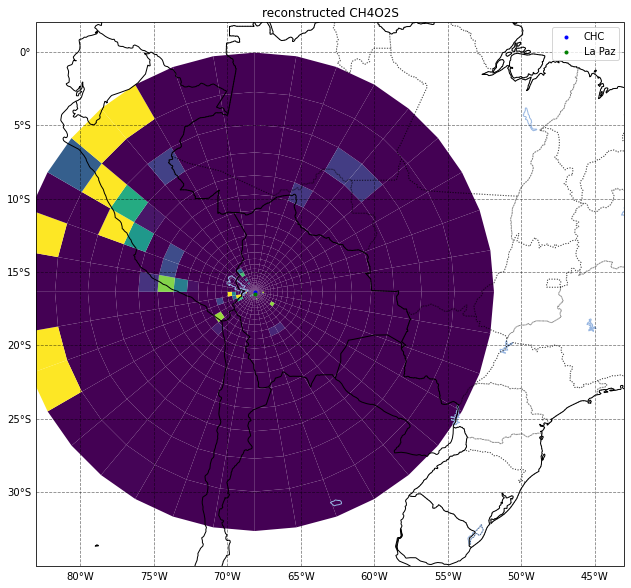

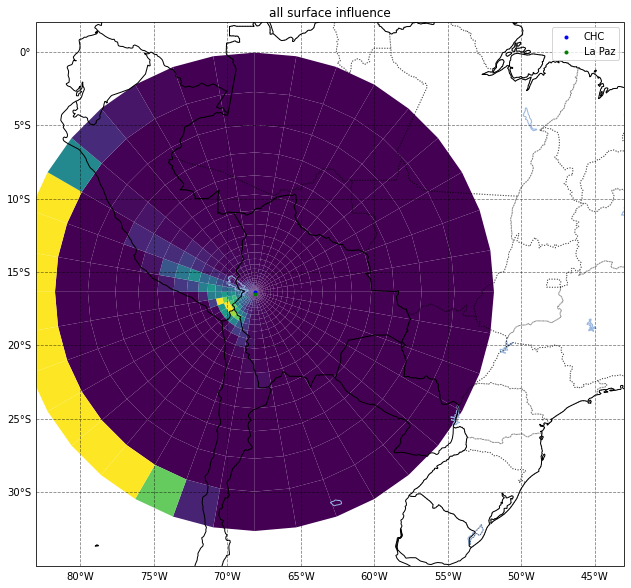

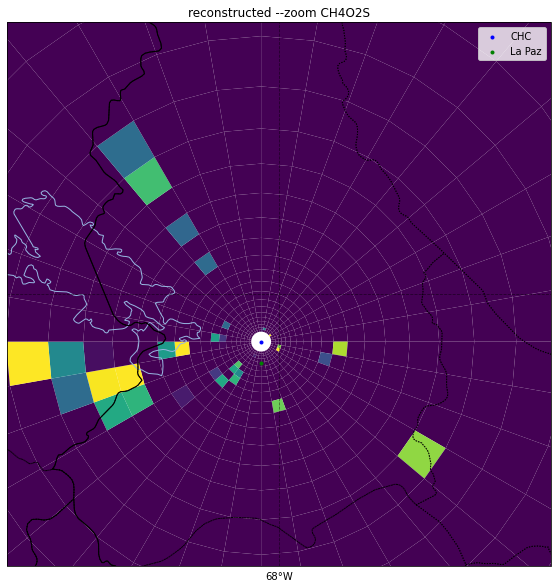

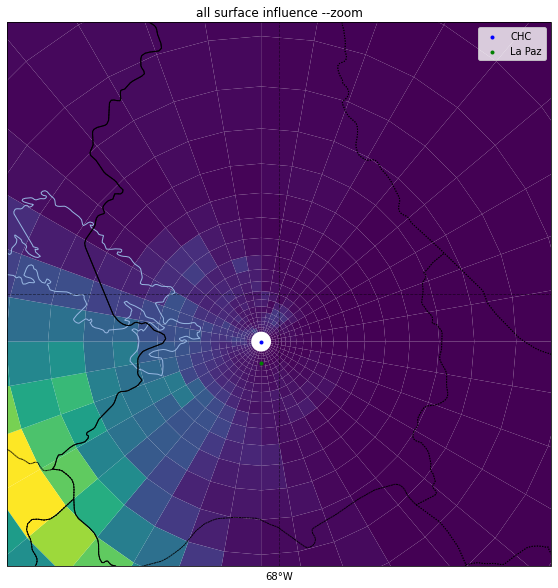

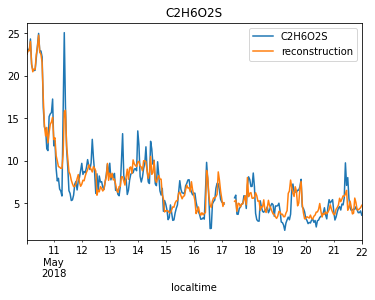

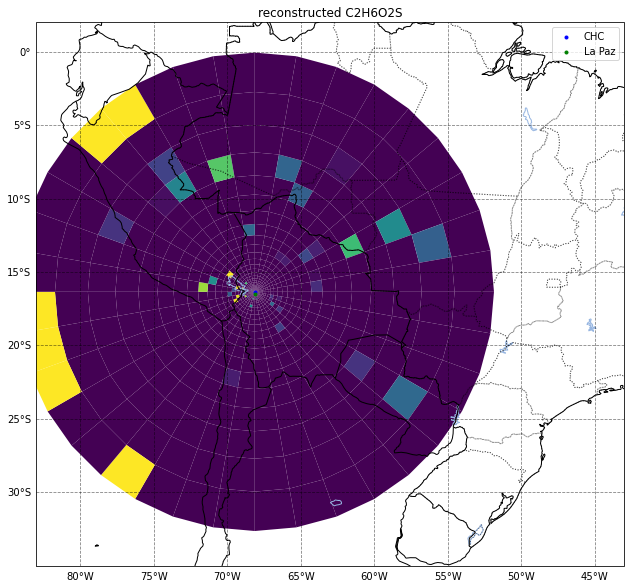

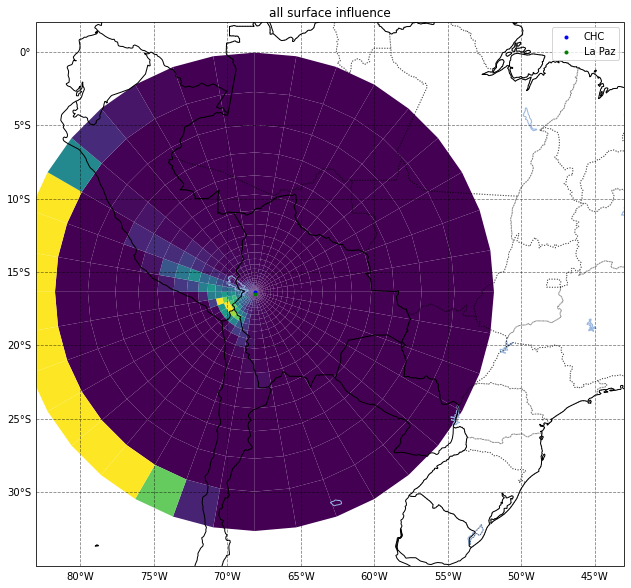

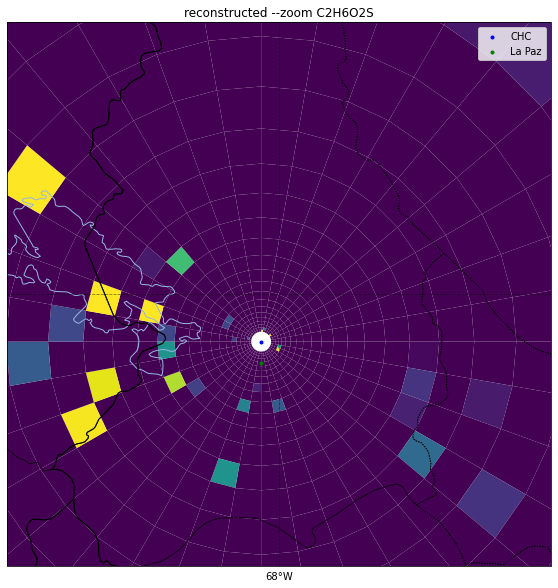

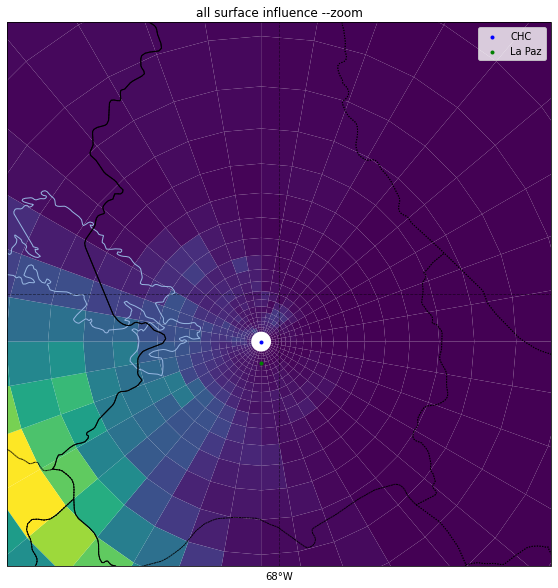

In [106]:
for par in list(com_ptr.columns):
#     for par in list(com_ptr.columns)[-1:]:

    df_pred,ds_coef, regr = fu.apply_elastic_net(com_ptr,com_flx, das_flx, par, cv = 4, ww=2 )

    fu.plot_ts(data_ptr, df_pred, par)
    plt.gca().set_title(f'{par}')

    fu.plt_map_bol2(com_ptr, ds_coef['coef'])
    plt.gca().set_title(f'reconstructed {par}')

    fu.plt_map_bol2(com_ptr, das_flx)
    plt.gca().set_title('all surface influence')

    fu.plt_map_lp2(com_ptr, ds_coef['coef'])
    plt.gca().set_title(f'reconstructed --zoom {par}')

    fu.plt_map_lp2(com_ptr, das_flx)
    plt.gca().set_title('all surface influence --zoom')

In [15]:
!jupyter-nbconvert --to=html z010_explore.ipynb

[NbConvertApp] Converting notebook z010_explore.ipynb to html
[NbConvertApp] Writing 3581428 bytes to z010_explore.html


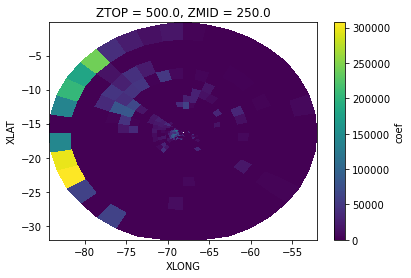

In [9]:
ds_coef['coef'].sum('localtime').plot(x='XLONG',y='XLAT')

In [19]:
from wiebke_dms_lake import flx_array as fa

In [49]:
import cartopy as crt

_ds = ds_coef['coef'].loc[{ 'localtime': com_ptr.index }].sum('localtime') 

_ = ['LAT_00',
 'LON_00',
 'LAT_10',
 'LON_10',
 'LAT_11',
 'LON_11',
 'LAT_01',
 'LON_01',]
_df = _ds.reset_coords(_).reset_coords(drop=True).to_dataframe()

from matplotlib.patches import Polygon

from shapely.geometry import Polygon

def polygon_from_row(r):
#     kw = {'closed': True, **kwargs}
    pol = Polygon([
        [r['LON_00'], r['LAT_00']],
        [r['LON_10'], r['LAT_10']],
        [r['LON_11'], r['LAT_11']],
        [r['LON_01'], r['LAT_01']],
    ])
    return pol

_df['geometry'] = _df.apply(polygon_from_row,axis=1)

In [50]:
import geopandas

<AxesSubplot:>

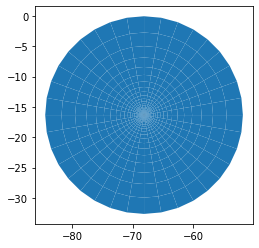

<GeoAxesSubplot:>

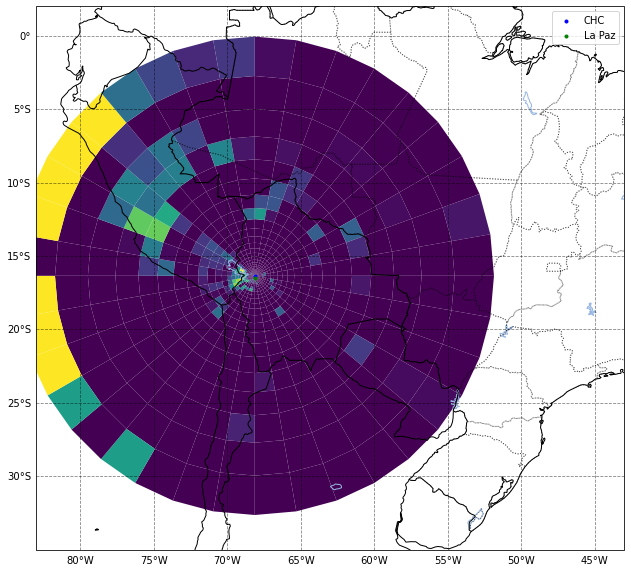

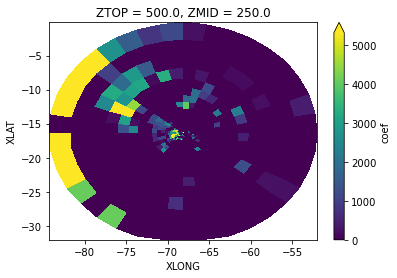

In [114]:
da = fu.get_conc_localtime_array()

In [117]:
da[{'R_CENTER':-1}].sum()

RuntimeError: NetCDF: HDF error